In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
toy_data = pd.read_csv('toy_dataset.csv')
toy_data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,NaN,40367.0,No
1,2,Dallas,Male,54.0,45084.0,No
2,3,Dallas,Male,NaN,52483.0,No
3,4,Dallas,Male,40.0,40941.0,No
4,5,Dallas,Male,NaN,50289.0,No


In [4]:
toy_data.dtypes

Number       int64
City        object
Gender      object
Age        float64
Income     float64
Illness     object
dtype: object

In [5]:
# проверим есть ли пропущенные значения
toy_data.isnull().sum()

Number     0
City       0
Gender     0
Age        3
Income     0
Illness    0
dtype: int64

In [6]:
# Применение Label Encoding к колонке 'Gender'
label_encoder = LabelEncoder()
toy_data['Gender'] = label_encoder.fit_transform(toy_data['Gender'])
toy_data['City'] = label_encoder.fit_transform(toy_data['City'])
toy_data['Illness'] = label_encoder.fit_transform(toy_data['Illness'])

In [7]:
cat_temp_data = toy_data[['Age']]
cat_temp_data.head()
cat_temp_data['Age'].unique()
cat_temp_data[cat_temp_data['Age'].isnull()].shape

(3, 1)

In [8]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2
toy_data['Age'] = data_imp2

In [9]:
toy_data.head()

,Number,City,Gender,Age,Income,Illness
0,1,2,1,26.0,40367.0,0
1,2,2,1,54.0,45084.0,0
2,3,2,1,26.0,52483.0,0
3,4,2,1,40.0,40941.0,0
4,5,2,1,26.0,50289.0,0


In [10]:
# Разделение данных на признаки и целевую переменную
# Используем Income в качестве целевой переменной для задачи регрессии
# и Illness_No в качестве целевой переменной для задачи классификации
X = toy_data.drop(['Income', 'Illness'], axis=1)
y_regression = toy_data['Income']
y_classification = toy_data['Illness']

In [11]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train_regression, y_test_regression = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_classification, y_test_classification = train_test_split(X, y_classification, test_size=0.2, random_state=42)


In [12]:
# Стандартизация данных для моделей SVM и линейной регрессии
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

In [13]:
# 1. Линейная регрессия
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train_regression)
y_pred_regression = linear_reg.predict(X_test_scaled)


In [14]:
# Оценка качества модели линейной регрессии
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
mse = mean_squared_error(y_test_regression, y_pred_regression)
r2 = r2_score(y_test_regression, y_pred_regression)
print("Линейная регрессия")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Линейная регрессия
Mean Squared Error: 433432080.7488195
R2 Score: 0.2946749185008182


In [15]:
# 2. SVM
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train_cls_scaled, y_train_classification)
y_pred_svm = svm_classifier.predict(X_test_cls_scaled)



In [16]:
# Оценка качества модели SVM
accuracy_svm = accuracy_score(y_test_classification, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test_classification, y_pred_svm)
class_report_svm = classification_report(y_test_classification, y_pred_svm)

c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\python\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
print("\nSVM")
print(f"Accuracy: {accuracy_svm}")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("Classification Report:")
print(class_report_svm)


SVM
Accuracy: 0.9207666666666666
Confusion Matrix:
[[27623     0]
 [ 2377     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27623
           1       0.00      0.00      0.00      2377

    accuracy                           0.92     30000
   macro avg       0.46      0.50      0.48     30000
weighted avg       0.85      0.92      0.88     30000



In [18]:
# 3. Дерево решений
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_cls, y_train_classification)
y_pred_tree = tree_classifier.predict(X_test_cls)

In [19]:
# Оценка качества модели дерева решений
accuracy_tree = accuracy_score(y_test_classification, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test_classification, y_pred_tree)
class_report_tree = classification_report(y_test_classification, y_pred_tree)

In [20]:
print("\nДерево решений")
print(f"Accuracy: {accuracy_tree}")
print("Confusion Matrix:")
print(conf_matrix_tree)
print("Classification Report:")
print(class_report_tree)


Дерево решений
Accuracy: 0.8463
Confusion Matrix:
[[25193  2430]
 [ 2181   196]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     27623
           1       0.07      0.08      0.08      2377

    accuracy                           0.85     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.85      0.85      0.85     30000



In [21]:
# Сравнение моделей
print("\nСравнение моделей")
print(f"Линейная регрессия - Mean Squared Error: {mse}, R2 Score: {r2}")
print(f"SVM - Accuracy: {accuracy_svm}")
print(f"Дерево решений - Accuracy: {accuracy_tree}")


Сравнение моделей
Линейная регрессия - Mean Squared Error: 433432080.7488195, R2 Score: 0.2946749185008182
SVM - Accuracy: 0.9207666666666666
Дерево решений - Accuracy: 0.8463


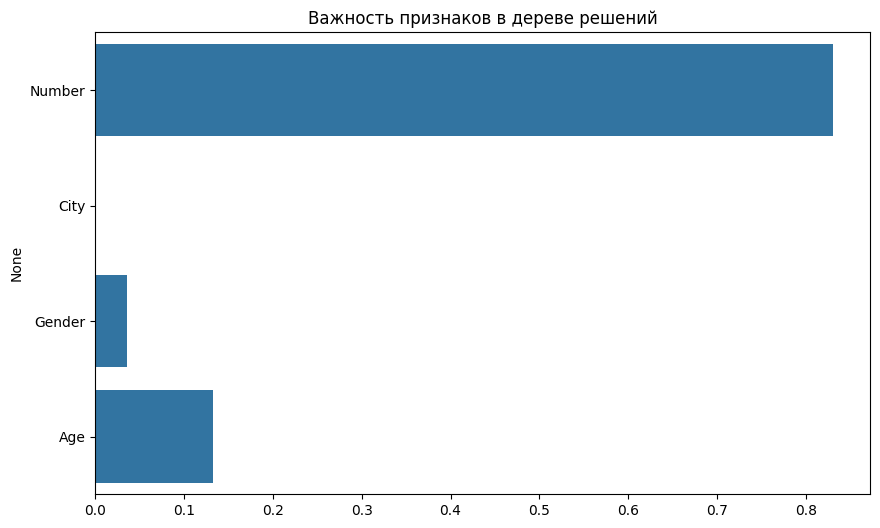

In [22]:
# Важность признаков в дереве решений
import seaborn as sns
feature_importances = tree_classifier.feature_importances_
features = X.columns

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Важность признаков в дереве решений')
plt.show()


In [23]:
# Визуализация дерева решений
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
plt.figure(figsize=(20, 10))
plot_tree(tree_classifier, feature_names=features, class_names=['No', 'Yes'], filled=True)
plt.title('Визуализация дерева решений')
plt.show()

KeyboardInterrupt: 